In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path

WindowsPath('C:/Users/humai/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()
bs = 64

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)

In [8]:
fnames[:5] #So its a list of paths of images

[WindowsPath('C:/Users/humai/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/humai/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/humai/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/humai/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/humai/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [10]:
#we need the labels from the file names
pat = r'/([^/]+)_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)
# ImageDataBunch gets the labels from the filenames using RE and then splits the data into train,valid and tests
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\humai\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,Sphynx,scottish_terrier,Russian_Blue,yorkshire_terrier
Path: C:\Users\humai\.fastai\data\oxford-iiit-pet\images;

Test: None

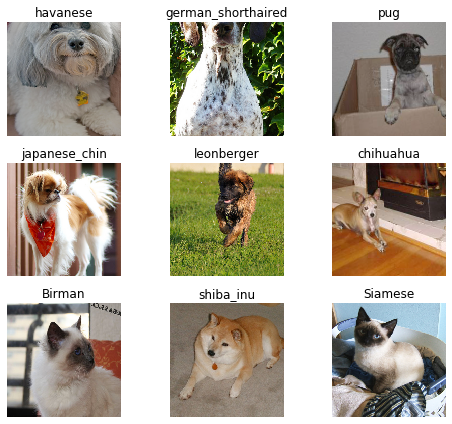

In [11]:
data.show_batch(rows=3,figsize = (7,6))

In [12]:
print(data.classes) # Classes hold all the label names 
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training : resnet34

In [13]:
learn = cnn_learner(data,models.resnet34,metrics = error_rate)

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
learn.fit_one_cycle(4)

In [16]:
learn.save('stage-1')

# Results

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

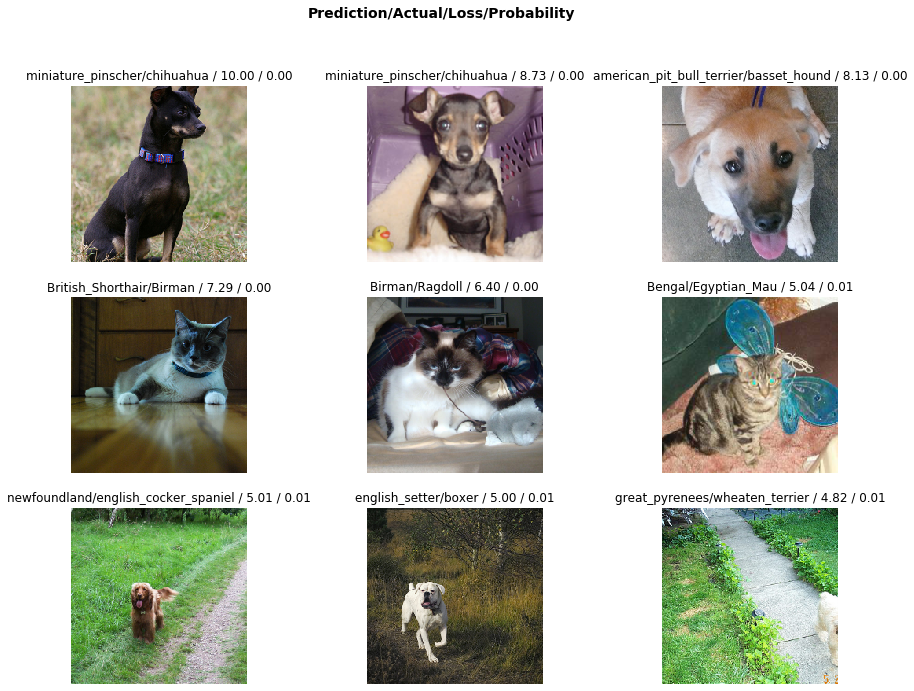

In [20]:
interp.plot_top_losses(9,figsize= (15,11))

In [21]:
doc(ClassificationInterpretation)

class ClassificationInterpretation [source] [test] ClassificationInterpretation ( learn : Learner , preds : Tensor , y_true : Tensor , losses : Tensor , ds_type : DatasetType = <DatasetType.Valid: 2> ) :: Interpretation 
 
 × Tests found for ClassificationInterpretation : pytest -sv tests/test_vision_train.py::test_ClassificationInterpretation [source] To run tests please refer to this guide . Interpretation methods for classification models. 
 Show in docs

In [25]:
doc(interp.plot_top_losses)

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , alpha : float = 0.6 , cmap : str = 'magma' , show_text : bool = True , return_fig : bool = None ) â†’ Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

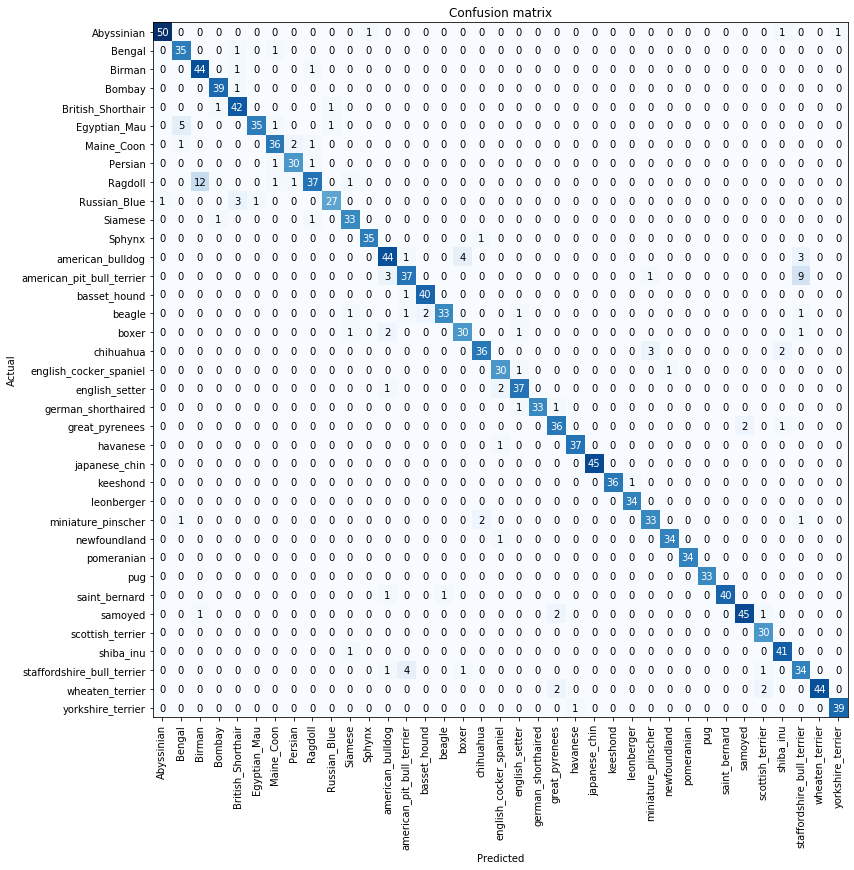

In [26]:
interp.plot_confusion_matrix(figsize = (12,12))

In [27]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 12),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_bulldog', 'boxer', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Maine_Coon', 'Persian', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'shiba_inu', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('wheaten_terrier', 'great_pyrenees', 2),
 ('wheaten_terrier', 'scottish_terrier', 2)]

# Unfreezing, fine-tuning, and learning rates

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)

In [31]:
#Since the error_rate has increased we can reload the previous checkpoint
learn.load('stage-1');

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


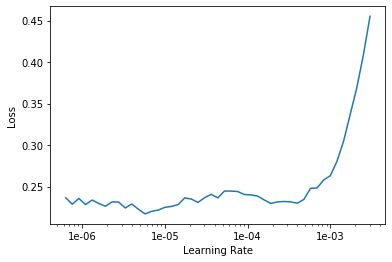

In [34]:
learn.recorder.plot()

In [38]:
#We can observe that the loss is minimum in between 1e-06 and 1e-04
#So we can tune our model accordingly
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

The error rate has decreased significantly

# Training: resnet50

In [20]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms()
                                  ,size = 299,bs=16).normalize(imagenet_stats)
                                    

In [21]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\humai\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
american_bulldog,beagle,great_pyrenees,saint_bernard,Birman
Path: C:\Users\humai\.fastai\data\oxford-iiit-pet\images;

Test: None

In [22]:
learn = cnn_learner(data,models.resnet50,metrics =[error_rate,accuracy])

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


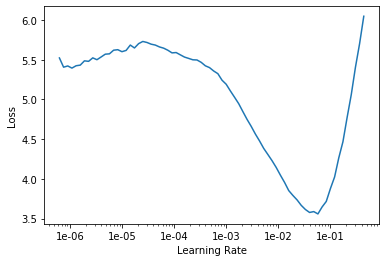

In [24]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,max_lr=slice(1e-2,1e-1))

# Other data formats

In [26]:
path = untar_data(URLs.MNIST_SAMPLE);

In [6]:
path

WindowsPath('C:/Users/humai/.fastai/data/mnist_sample')

In [28]:
path.ls()

[WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/labels.csv'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/valid')]

In [31]:
(path/'train').ls()

[WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/7')]

In [7]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms = tfms,size =26)

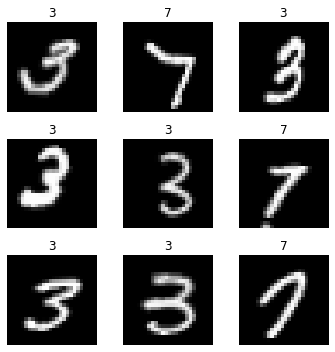

In [8]:
data.show_batch(rows=3,figsize= (5,5))

From LABELS.CSV

In [9]:
import pandas as pd
#Here the labels are stored in a csv file 
df = pd.read_csv(path/'labels.csv')

In [11]:
df.head()

name  label
0   train/3/7463.png      0
1  train/3/21102.png      0
2  train/3/31559.png      0
3  train/3/46882.png      0
4  train/3/26209.png      0

In [12]:
data = ImageDataBunch.from_csv(path,ds_tfms = tfms,size=26)

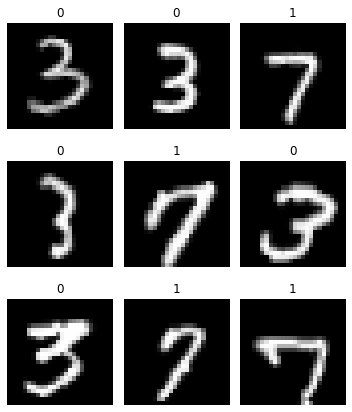

In [13]:
data.show_batch(rows =3,figsize = (5,6))

In [14]:
data.classes

[0, 1]

From Reg Ex

In [21]:
fn_paths = [path/name for name in df['name']]

In [54]:
fn_paths[:5]

[WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3/7463.png'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3/21102.png'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3/31559.png'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3/46882.png'),
 WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3/26209.png')]

In [23]:

pat = r"/(\d)/\d+\.png$"

#What we are going to do is pass the PATH to the data,
#File name path of all the images,
#label we want to extract from the image using REGULAR EXPRESSIONS,
#Data transforms

data = ImageDataBunch.from_name_re(path,fn_paths,pat=pat,ds_tfms = tfms,size=24)
data.classes

['3', '7']

USER DEFINED FUNCTIONS to extract labels

In [40]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['7']

In [60]:
'/3/' in str(fn_paths[0])

False

In [62]:
fn_paths[0]

WindowsPath('C:/Users/humai/.fastai/data/mnist_sample/train/3/7463.png')

In [63]:
# labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
# labels[:5]

# data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
# data.classes


['7', '7', '7', '7', '7']